# **Tugas Besar Data Mining Kelompok 9**

---

Anggota :

1. Nathaniel Yusuf Langelo  - 102022480033
2. Achmad Fanial Hubaib     - 102022480027
3. Fikri Muhammad Awaludin  - 1020224800288

### **Business Understanding**
---

Tujuan Bisnis:
Mendeteksi risiko serangan jantung sedini mungkin berdasarkan data medis dan gaya hidup pasien. Hal ini bertujuan untuk membantu rumah sakit, klinik, atau aplikasi kesehatan dalam memberikan peringatan atau saran medis preventif kepada pasien yang memiliki risiko tinggi terkena serangan jantung.

Tujuan Analitik:
Mengembangkan model prediksi klasifikasi yang dapat mengidentifikasi apakah seorang pasien berisiko terkena serangan jantung berdasarkan fitur-fitur klinis dan demografis seperti usia, tekanan darah, kolesterol, detak jantung maksimum, dan lain-lain.

Dataset ini berisi informasi mengenai kumpulan data penyakit jantung di rumah sakit Zheen di Erbil, Irak, dari Januari 2019 hingga Mei 2019. Berikut informasi kolom-kolom yang terdapat dalam dataset:

1. **Age**: Usia pasien

2. **Gender**: Jenis kelamin pasien (1 = Pria/ 0 = Wanita)

3. **Hearth Rate**: Jumlah detak jantung per menit

4. **Systolic blood pressure** : Tekanan dalam arteri saat jantung berkontraksi

5. **Diastolic blood pressure**: Tekanan di arteri saat detak jantung

6. **Blood sugar**: Tingkat glukosa darah pasien

7. **CK-MB**: Enzim jantung yang dilepaskan selama kerusakan otot jantung

8. **Troponin**: Biomarker protein yang sangat spesifik untuk cedera otot jantung

9. **Result**: Label hasil yang menunjukkan apakah pasien mengalami serangan jantung atau tidak

### **Data Understanding**
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
# Melihat Deskripsi dataset
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
# Melihat jumlah baris dan kolom dataset
df.shape

(1319, 9)

In [6]:
# Melihat missing value pada data
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

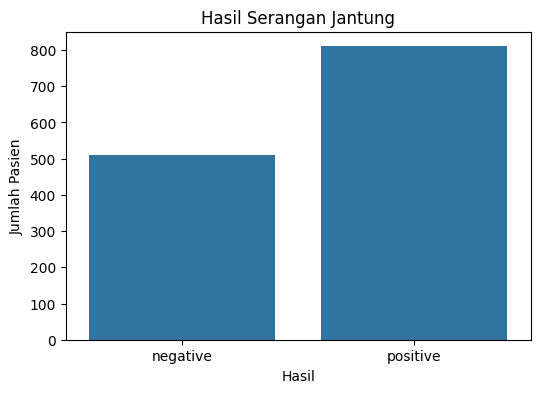

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot hasil serangan Jantung
plt.figure(figsize=(6,4))
sns.countplot(x='Result', data=df)
plt.title('Hasil Serangan Jantung')
plt.ylabel('Jumlah Pasien')
plt.xlabel('Hasil')
plt.show()

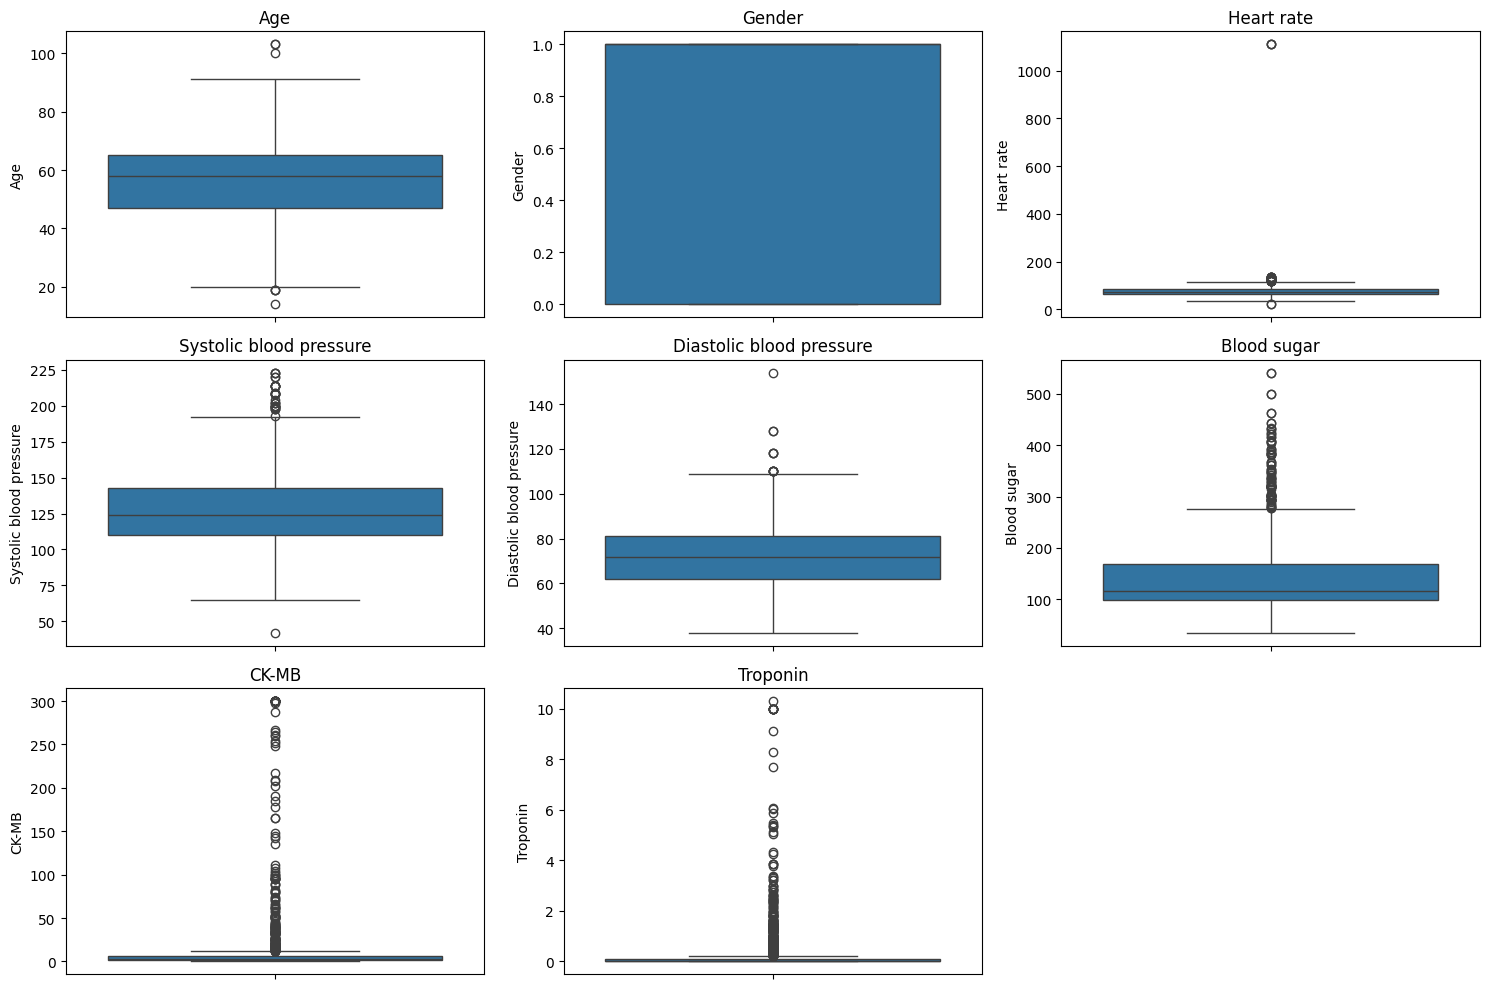

In [8]:
# Boxplot untuk identifikasi outlier pada kolom numerik
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('boxplot_outlier.png')
plt.show()

### **Data Preparation**
---

In [9]:
# Membuat salinan dataframe untuk preprocessing
df_processed = df.copy()

In [10]:
# Menghapus data outlier
print("\n== Penanganan Outlier Menggunakan Metode IQR ==")
numerical_cols_for_outlier = df_processed.select_dtypes(include=np.number).columns

for col in numerical_cols_for_outlier:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

print("\nStatistik deskriptif dataset (setelah penanganan outlier dengan IQR):")
print(df_processed[numerical_cols_for_outlier].describe())


== Penanganan Outlier Menggunakan Metode IQR ==

Statistik deskriptif dataset (setelah penanganan outlier dengan IQR):
               Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.175891     0.659591    75.931766               126.828658   
std      13.559602     0.474027    14.807730                25.029865   
min      20.000000     0.000000    32.500000                60.500000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max      92.000000     1.000000   116.500000               192.500000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.185747   141.249962     4.463456     0.058548  
std


== Boxplot Kolom Numerik (Setelah Penanganan Outlier dengan IQR) ==


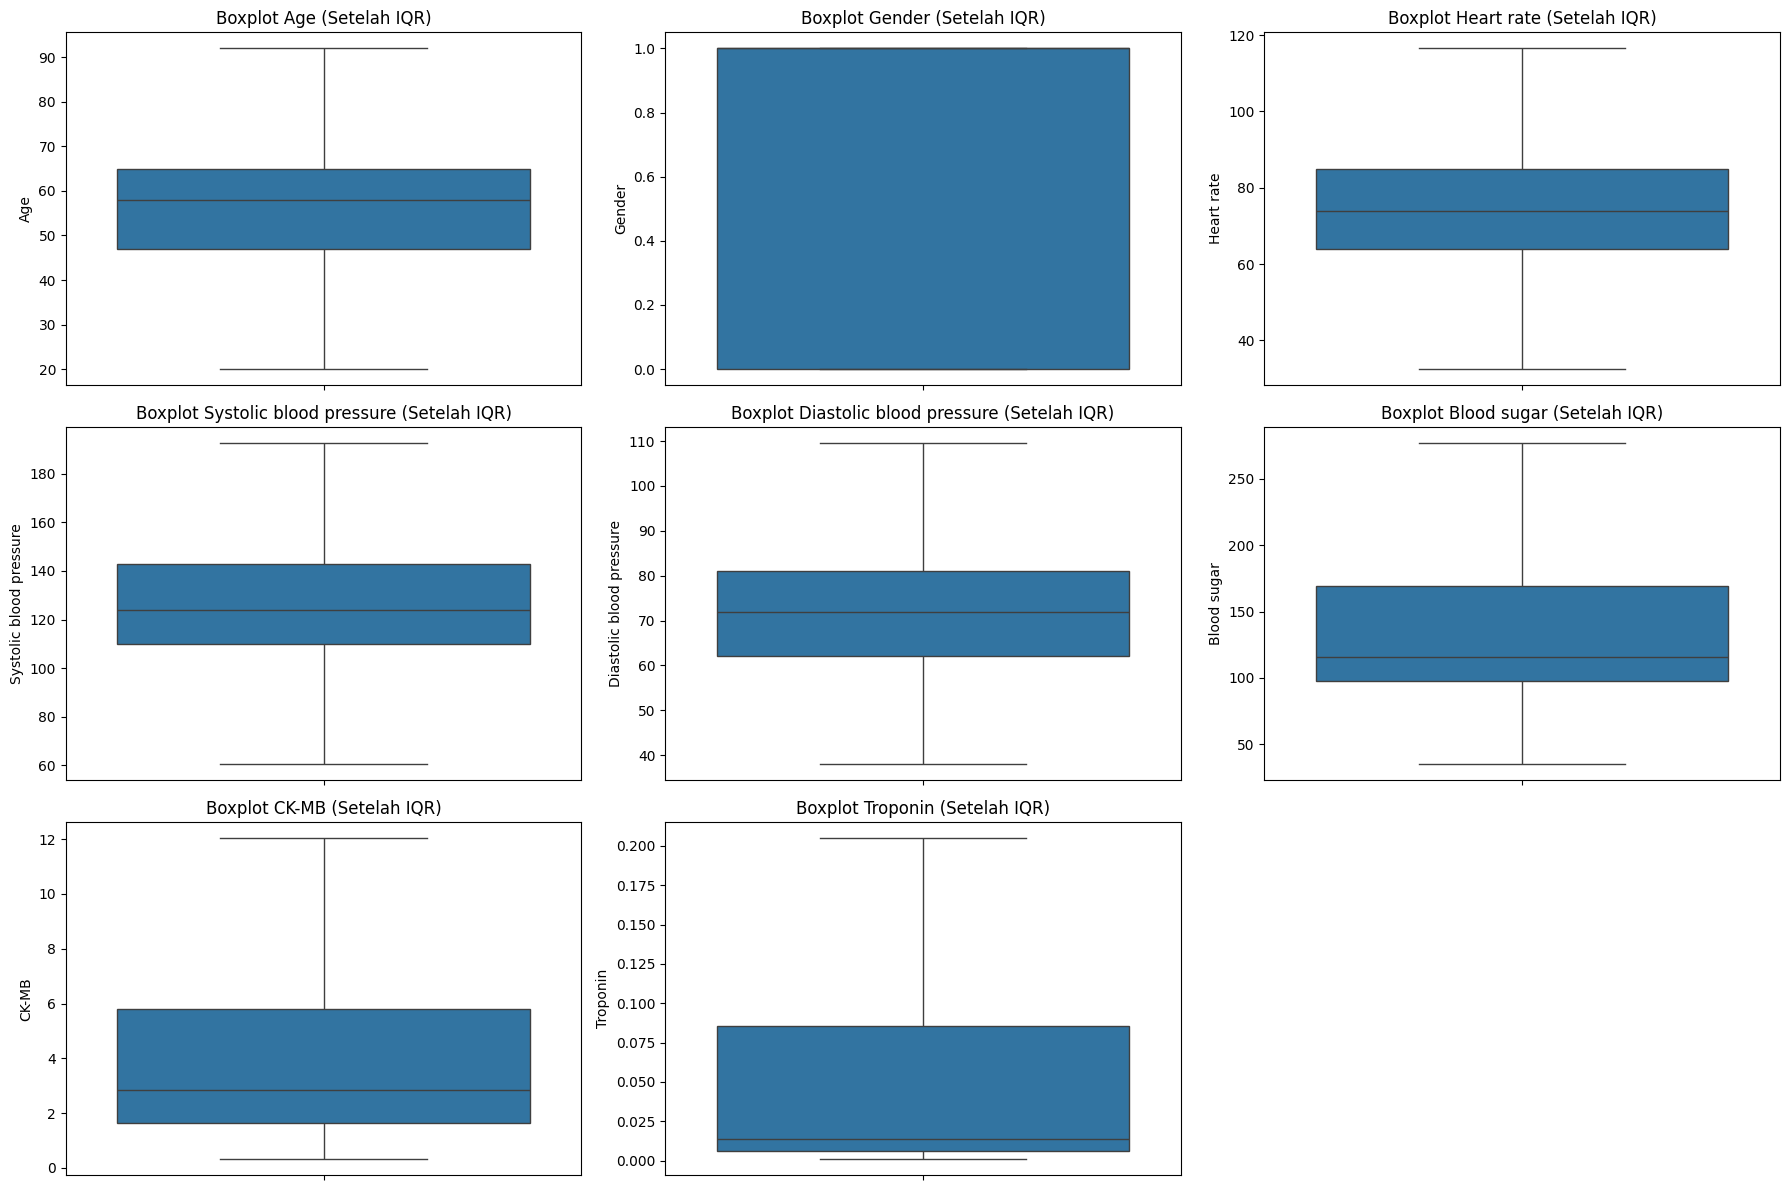

In [11]:
# Boxplot untuk identifikasi outlier pada kolom numerik (setelah penanganan)
print("\n== Boxplot Kolom Numerik (Setelah Penanganan Outlier dengan IQR) ==")
plt.figure(figsize=(18, 12)) # Adjusted figure size
for i, col in enumerate(numerical_cols_for_outlier):
    plt.subplot(3, 3, i + 1) # Adjusted subplot grid
    sns.boxplot(y=df_processed[col])
    plt.title(f'Boxplot {col} (Setelah IQR)')
plt.tight_layout()
plt.savefig('boxplot_outlier-clean.png')
plt.show()

In [12]:
# Capping 'Heart rate'
max_heart_rate_cap = 220
df_processed['Heart rate'] = np.where(df_processed['Heart rate'] > max_heart_rate_cap, max_heart_rate_cap, df_processed['Heart rate'])

In [13]:
# Capping 'CK-MB' menggunakan persentil ke-99
ck_mb_cap_99 = df_processed['CK-MB'].quantile(0.99)
df_processed['CK-MB'] = np.where(df_processed['CK-MB'] > ck_mb_cap_99, ck_mb_cap_99, df_processed['CK-MB'])

In [14]:
print("\nStatistik deskriptif setelah penanganan outlier :")
print(df_processed[['Heart rate', 'CK-MB']].describe())


Statistik deskriptif setelah penanganan outlier :
        Heart rate        CK-MB
count  1319.000000  1319.000000
mean     75.931766     4.463456
std      14.807730     3.825702
min      32.500000     0.321000
25%      64.000000     1.655000
50%      74.000000     2.850000
75%      85.000000     5.805000
max     116.500000    12.030000


In [15]:
# 2. Encoding variabel target 'Result'
# Mengubah 'negative' menjadi 0 dan 'positive' menjadi 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_processed['Result_encoded'] = label_encoder.fit_transform(df_processed['Result']) 

In [16]:
# Memisahkan fitur (X) dan target (y) SEBELUM scaling
X = df_processed.drop(['Result', 'Result_encoded'], axis=1) # Variabel independen
y = df_processed['Result_encoded'] # Variabel dependen

### **Modeling**
---

In [17]:
# membagi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = X_train.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()

In [19]:
# Fit scaler pada data latih dan transform data latih
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# Transform data uji menggunakan scaler yang sudah di-fit pada data latih
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [20]:
print(X_train_scaled.head())

           Age  Gender  Heart rate  Systolic blood pressure  \
881   0.472222     1.0    0.363095                 0.313725   
723   0.222222     0.0    0.315476                 0.564706   
889   0.625000     1.0    0.529762                 0.447059   
1004  0.722222     0.0    0.732143                 0.447059   
761   0.486111     0.0    0.422619                 0.400000   

      Diastolic blood pressure  Blood sugar     CK-MB  Troponin  
881                   0.363636     0.281430  0.992314  0.019632  
723                   0.601399     0.179931  0.327013  0.009816  
889                   0.279720     0.212226  0.106670  1.000000  
1004                  0.405594     1.000000  0.065676  0.073620  
761                   0.503497     0.382930  0.087027  0.456442  


In [21]:
# --- Modeling (Klasifikasi) ---
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')


== Evaluasi Model Klasifikasi (Logistic Regression) ==


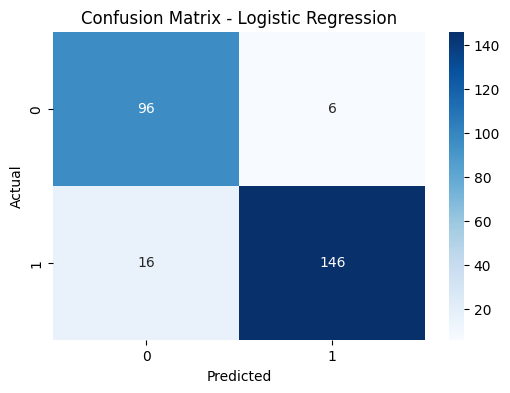

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       102
           1       0.96      0.90      0.93       162

    accuracy                           0.92       264
   macro avg       0.91      0.92      0.91       264
weighted avg       0.92      0.92      0.92       264


Akurasi: 0.9166666666666666
ROC AUC Score: 0.6979242314209635


In [22]:
# --- Evaluation (Klasifikasi) ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
y_pred_lr = model_lr.predict(X_test_scaled)
y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

print("\n== Evaluasi Model Klasifikasi (Logistic Regression) ==")
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix.png')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_lr))

# Akurasi
print("\nAkurasi:", accuracy_score(y_test, y_pred_lr))

# Evaluasi ROC AUC
y_proba = model_lr.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

### **Clustering**
---

ROC AUC Score: 0.9599975792786251


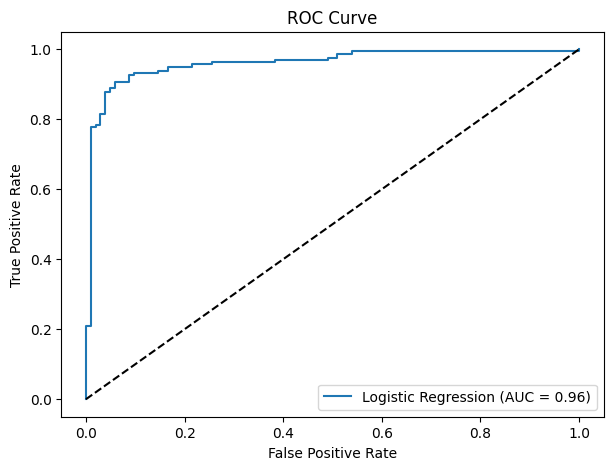

In [23]:
# ROC AUC
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("ROC AUC Score:", auc_lr)

# ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

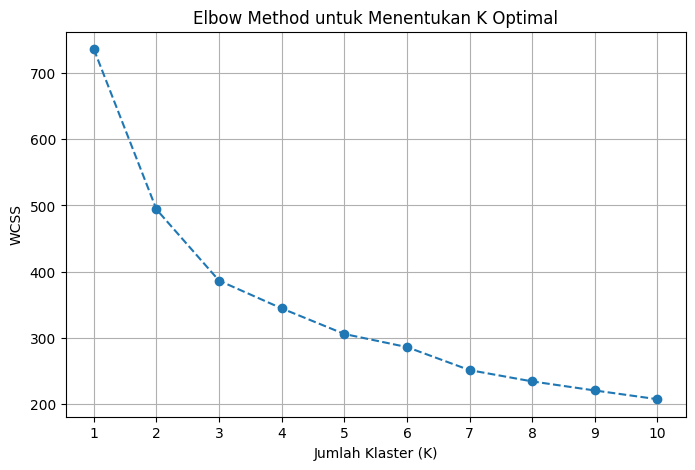

In [24]:
# --- Modeling (Clustering) ---
# Menggunakan data fitur yang sudah di-scaling (X_train_scaled)
# karena clustering sensitif terhadap skala fitur.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Mencari jumlah kluster optimal menggunakan Elbow Method
wcss = []
silhouette_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init ditambahkan
    kmeans.fit(X_train_scaled[numerical_features]) # Hanya fitur numerik untuk K-Means
    wcss.append(kmeans.inertia_)

    # cluster_labels  = kmeans.labels_
    # silhouette_avg = silhouette_score(X_test_scaled[numerical_features], cluster_labels)
    # silhouette_score.append(silhouette_avg)
    # print(f"untuk cluster = {i}, silhoute score adalah {silhouette_avg:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled[numerical_features])

# Menambahkan label cluster ke data latih (yang sudah di-scale)
X_train_clustered = X_train_scaled.copy()
X_train_clustered['Cluster'] = cluster_labels

# --- Evaluation (Clustering) ---
score = silhouette_score(X_train_scaled[numerical_features], cluster_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3374519122069424


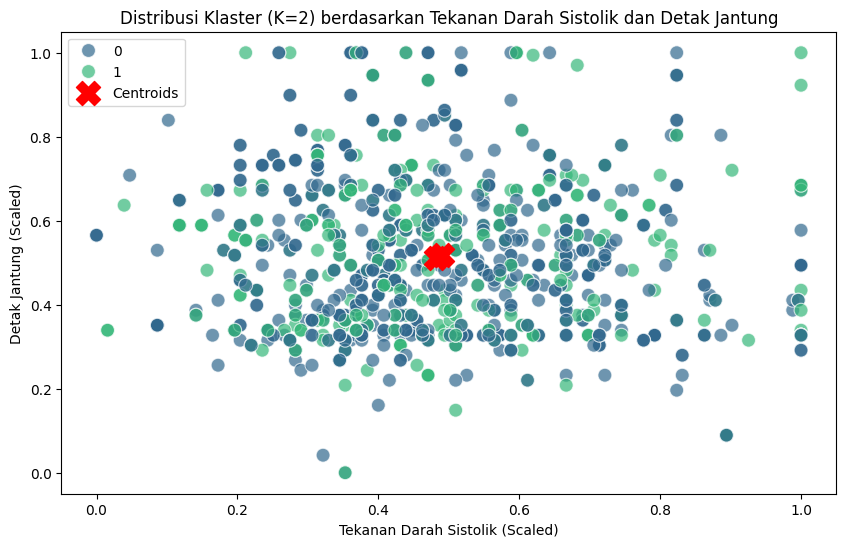

In [26]:
# --- Visualisasi Hasil Clustering (Contoh menggunakan 2 fitur) ---
# Anda bisa menggunakan PCA untuk mereduksi dimensi jika fiturnya banyak
# Di sini kita contohkan dengan 2 fitur asli untuk kemudahan interpretasi
optimal_k = 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_clustered['Systolic blood pressure'], 
                y=X_train_clustered['Heart rate'], 
                hue=X_train_clustered['Cluster'], 
                palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, numerical_features.tolist().index('Systolic blood pressure')], 
            kmeans.cluster_centers_[:, numerical_features.tolist().index('Heart rate')], 
            s=300, c='red', marker='X', label='Centroids') # Menandai centroid
plt.title(f'Distribusi Klaster (K={optimal_k}) berdasarkan Tekanan Darah Sistolik dan Detak Jantung')
plt.xlabel('Tekanan Darah Sistolik (Scaled)')
plt.ylabel('Detak Jantung (Scaled)')
plt.legend()
plt.show()

In [27]:
# Analisis Karakteristik Cluster (Contoh)
# menghitung rata-rata fitur untuk setiap cluster
cluster_characteristics = X_train_clustered.groupby('Cluster')[numerical_features].mean()
print("\nKarakteristik Rata-rata Fitur per Cluster:")
print(cluster_characteristics)


Karakteristik Rata-rata Fitur per Cluster:
              Age  Gender  Heart rate  Systolic blood pressure  \
Cluster                                                          
0        0.489182     1.0    0.517952                 0.490570   
1        0.527854     0.0    0.512429                 0.482234   

         Diastolic blood pressure  Blood sugar     CK-MB  Troponin  
Cluster                                                             
0                        0.474160     0.371359  0.344640  0.327357  
1                        0.477027     0.375526  0.338684  0.211935  


### **Deployment**
---

In [44]:
import joblib
joblib.dump(model_lr, "model.pkl")

['model.pkl']

In [45]:
#install streamlit
!pip install streamlit 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
#install Ngrok
!pip install pyngrok


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
#Ngrok authoken
!ngrok config add-authtoken 2wrxPVyxdMs0iKOfss3YS5NWVhG_7WnwBuci9fAT8zNp8nkRx 

Authtoken saved to configuration file: C:\Users\Niel\AppData\Local/ngrok/ngrok.yml


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load model and data
model = joblib.load("model.pkl")
df_original = pd.read_csv('Medicaldataset.csv')
df_processed = df_original.copy()

# Outlier handling
numerical_cols = df_processed.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_processed[col] = np.clip(df_processed[col], lower, upper)

max_heart_rate_cap = 220
df_processed['Heart rate'] = np.minimum(df_processed['Heart rate'], max_heart_rate_cap)
ck_mb_cap_99 = df_processed['CK-MB'].quantile(0.99)
df_processed['CK-MB'] = np.minimum(df_processed['CK-MB'], ck_mb_cap_99)

X = df_processed.drop(['Result'], axis=1)
scaler = MinMaxScaler()
X[X.select_dtypes(include=np.number).columns] = scaler.fit_transform(X.select_dtypes(include=np.number))

# 🌟 App layout and style
st.set_page_config(page_title="Heart Attack Risk Prediction", page_icon="❤️", layout="centered")

st.markdown("""
    <div style="text-align: center;">
        <h1 style="color: red;">❤️ Heart Attack Risk Prediction</h1>
        <p style="font-size: 18px;">Enter the patient's medical data to estimate their heart attack risk using AI.</p>
    </div>
    <hr>
""", unsafe_allow_html=True)

# 🎛 Input form layout
with st.form("input_form"):
    col1, col2 = st.columns(2)
    with col1:
        age = st.number_input("Age", min_value=1, max_value=120, value=50)
        gender = st.selectbox("Gender", options=[0, 1], format_func=lambda x: 'Male' if x == 1 else 'Female')
        heart_rate = st.number_input("Heart Rate (bpm)", min_value=0.0, value=70.0)
        systolic_bp = st.number_input("Systolic BP (mmHg)", min_value=0.0, value=120.0)
    with col2:
        diastolic_bp = st.number_input("Diastolic BP (mmHg)", min_value=0.0, value=80.0)
        blood_sugar = st.number_input("Blood Sugar (mg/dL)", min_value=0.0, value=100.0)
        ck_mb = st.number_input("CK-MB (ng/mL)", min_value=0.0, value=5.0)
        troponin = st.number_input("Troponin (ng/mL)", min_value=0.0, value=0.1)

    submitted = st.form_submit_button("🧠 Predict")

# 🧾 Prediction process
if submitted:
    input_data = {
        'Age': age,
        'Gender': gender,
        'Heart rate': heart_rate,
        'Systolic blood pressure': systolic_bp,
        'Diastolic blood pressure': diastolic_bp,
        'Blood sugar': blood_sugar,
        'CK-MB': ck_mb,
        'Troponin': troponin
    }

    input_df = pd.DataFrame([input_data])

    # Outlier bounds clipping
    for col in input_df.columns:
        if col in df_processed.columns:
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            cap = ck_mb_cap_99 if col == 'CK-MB' else max_heart_rate_cap if col == 'Heart rate' else upper
            input_df[col] = np.clip(input_df[col], lower, cap)

    # Scaling
    input_df[input_df.select_dtypes(include=np.number).columns] = scaler.transform(input_df[input_df.select_dtypes(include=np.number).columns])

    # Prediction
    prediction = model.predict(input_df)
    proba = model.predict_proba(input_df)[0][1]

    # 🎯 Display result
    st.markdown("<hr>", unsafe_allow_html=True)
    st.subheader("🧾 Prediction Result:")
    if prediction[0] == 1:
        st.error(f"🔴 High Risk of Heart Attack")
    else:
        st.success(f"🟢 Low Risk of Heart Attack")

    st.markdown(f"""
    <div style="font-size:18px">
        <strong>Predicted Probability:</strong> <span style="color:blue;">{proba:.2f}</span>
    </div>
    """, unsafe_allow_html=True)

    st.info("⚠️ This result is a prediction based on machine learning and should not replace professional medical advice.")

2025-05-27 23:32:46.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:32:46.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
df_processed['Age']

0       64
1       21
2       55
3       64
4       55
        ..
1314    44
1315    66
1316    45
1317    54
1318    51
Name: Age, Length: 1319, dtype: int64

In [50]:
from pyngrok import ngrok
import threading
import time
import os

In [52]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

# Disconnect all tunnels before creating a new one
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)
    
thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://11cc-182-253-194-9.ngrok-free.app" -> "http://localhost:8501"
